# Unit operation results

### A note on design and modeling

BioSTEAM includes a wide range of [unit operation](../API/units/index.txt) models and cost correlations adapted from design textbooks and literature [[1-5]](#References). Essential unit operations such as [pumps](../API/units/Pump.txt), [heat exchangers](../API/units/heat_exchange.txt), [flash vessels](../API/units/Flash.txt), [mixer-settlers](../API/units/liquid_liquid_extraction.txt), and [distillation columns](../API/units/distillation.txt) are some of the most rigorously modeled and designed. Design requirements for these essential units are calculated based on design specifications such as operating temperature and pressure, feed conditions, construction material, and degree of separation. These design requirements include, but are not limited to, the heat-transfer area of heat exchangers, the size and thickness of pressure vessels, and number of stages in a distillation column. Other unit operation models are modeled as [splitters](../API/units/splitting.txt) (i.e., a specified fraction of each component entering a unit is separated), and the purchase price is estimated using size factor correlations that are ultimately a function of material flow rates. BioSTEAM chooses purchase price correlations and construction factors based on the design specifications and requirements for each unit operation. For detailed documentation and examples of each unit operation, visit the [units subpackage documentation](../API/units/index.txt).

### Distillation columns 

In the following example, BioSTEAM's distillation column is used to highlight key details here on where do unit operations store results:

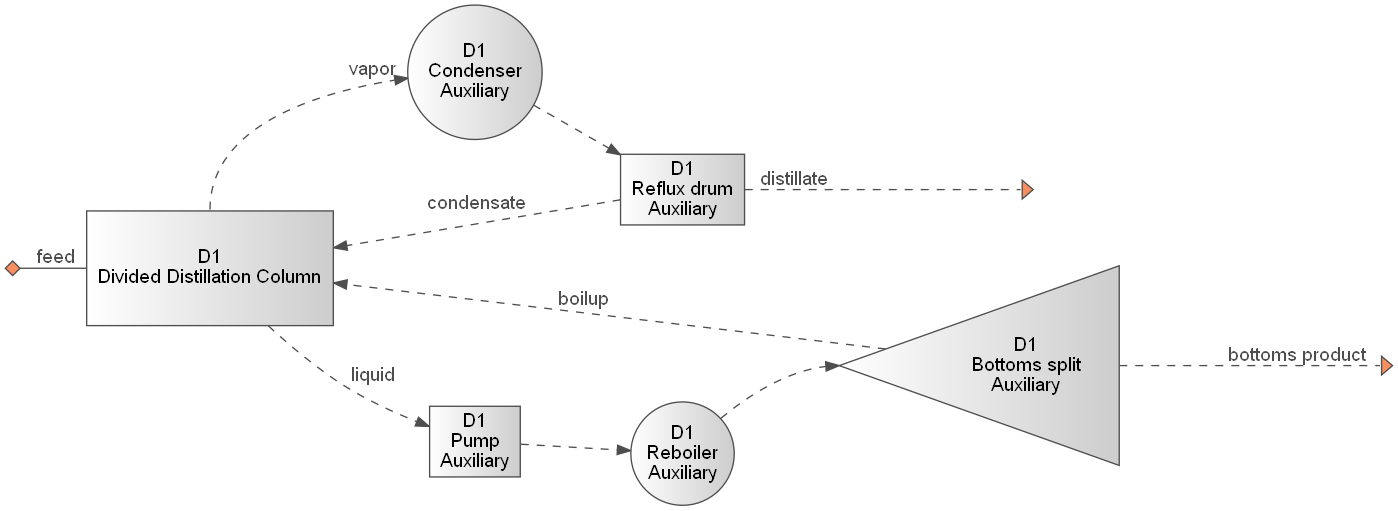

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 354.28 K, P: 101325 Pa
    flow (kmol/hr): Water    1.08e+03
                    Ethanol  586
outs...
[0] distillate  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] bottoms_product  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [1]:
from biosteam import Stream, settings
import biosteam as bst
bst.nbtutorial()

# First set the property package
settings.set_thermo(['Water', 'Ethanol'])

# Create the feed at the bubble point
feed = Stream('feed', Water=1.08e+03, Ethanol=586)
bp = feed.bubble_point_at_P()
feed.T = bp.T # Feed at bubble point temperature

# Create a distillation column and simulate
# Use BinaryDistillation for 2-components
# For 3+ components, use ShortcutColumn
D1 = bst.BinaryDistillation( 
    'D1', ins=feed,
    outs=('distillate', 'bottoms_product'),
    LHK=('Ethanol', 'Water'), # Light and heavy keys
    y_top=0.79, # Light key composition at the distillate
    x_bot=0.001, # Light key composition at the bottoms product
    k=1.25, # Ratio of actual reflux over minimum reflux
    is_divided=True, # Whether the rectifying and stripping sections are divided
)
D1.diagram(format='png')
D1.show()

Before simulating a distillation column, no results are available, streams are empty, and the components are initialized but empty as well:

In [2]:
D1.design_results

{}

In [3]:
D1.purchase_costs

{}

In [4]:
D1.heat_utilities

[]

In [5]:
D1.power_utility

PowerUtility:
consumption: 0 kW
production: 0 kW
power: 0 kW
cost: 0 USD/hr


All unit operations have the `design_results`, `purchase_costs`, `heat_utilities`, and `power_utility` attributes. The `heat_utilities` attribute is a list of [HeatUtility](../API/HeatUtility.txt) objects and the `power_utility` attribute is a [PowerUtility](../API/PowerUtility.txt) object. Unit operations may also have attributes and components specific to that unit operation. Let's look at the condenser within the diagram:

In [6]:
D1.condenser.diagram()
D1.condenser.show()

HXutility: condenser
ins...
[0] vapor  from  BinaryDistillation-D1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
outs...
[0] to  RefluxDrum-reflux_drum
    phases: ('g', 'l'), T: 298.15 K, P: 101325 Pa
     flow: 0


After simulation, the unit operation along with its components will calculate all design results, purchase costs, and utilities:

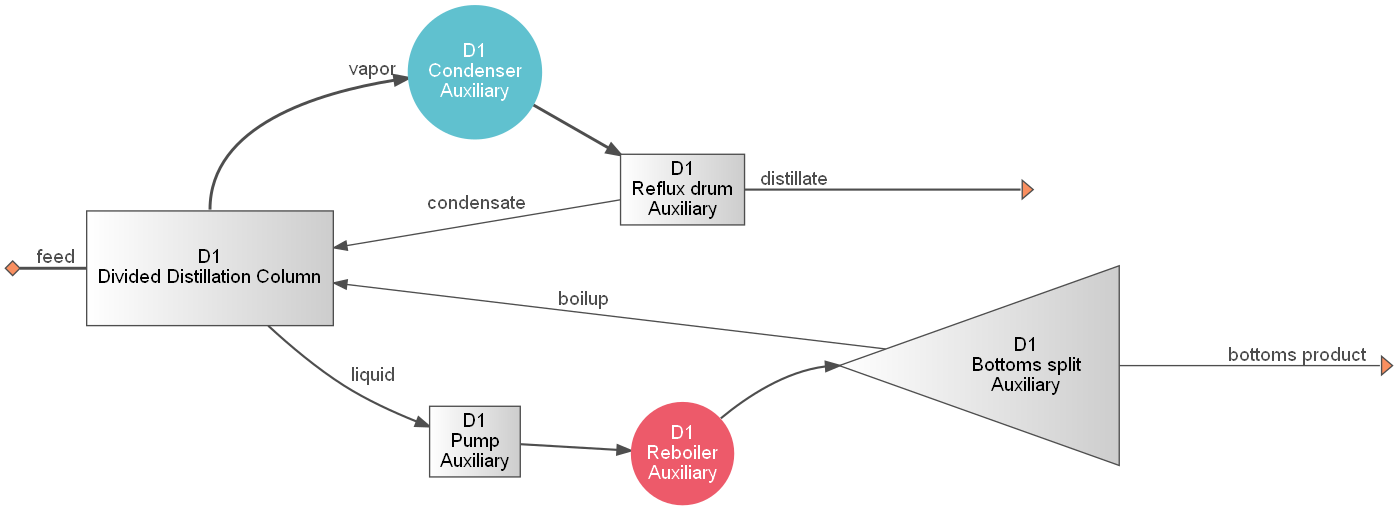

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 81.125 degC, P: 1 atm
    composition (%): Water    64.8
                     Ethanol  35.2
                     -------  1.67e+03 kmol/hr
outs...
[0] distillate  
    phase: 'g', T: 78.484 degC, P: 1 atm
    composition (%): Water    21
                     Ethanol  79
                     -------  741 kmol/hr
[1] bottoms_product  
    phase: 'l', T: 99.64 degC, P: 1 atm
    composition (%): Water    99.9
                     Ethanol  0.1
                     -------  925 kmol/hr


In [7]:
D1.simulate()
D1.diagram(format='png')
D1.show(T='degC', P='atm', composition=True)

In [8]:
D1.condenser.show()

HXutility: condenser
ins...
[0] vapor  from  BinaryDistillation-D1
    phase: 'g', T: 351.72 K, P: 101325 Pa
    flow (kmol/hr): Water    329
                    Ethanol  1.13e+03
outs...
[0] to  RefluxDrum-reflux_drum
    phases: ('g', 'l'), T: 351.63 K, P: 101325 Pa
    flow (kmol/hr): (g) Water    156
                        Ethanol  585
                    (l) Water    173
                        Ethanol  540


In [9]:
D1.design_results

{'Theoretical feed stage': 26,
 'Theoretical stages': 31,
 'Minimum reflux': 0.7708367097030262,
 'Reflux': 0.9635458871287828,
 'Rectifier stages': 45.0,
 'Stripper stages': 9.0,
 'Rectifier height': 78.940416,
 'Stripper height': 25.804416,
 'Rectifier diameter': 9.960477527218737,
 'Stripper diameter': 7.836628484724038,
 'Rectifier wall thickness': 0.4375,
 'Stripper wall thickness': 0.375,
 'Rectifier weight': 41837.555210317725,
 'Stripper weight': 12158.19021210372}

In [10]:
D1.purchase_costs

{'Rectifier trays': 90190.76854619542,
 'Stripper trays': 19469.07052587847,
 'Rectifier tower': 154203.6774309562,
 'Stripper platform and ladders': 48571.69910583489,
 'Stripper tower': 69659.22647677979,
 'Rectifier platform and ladders': 17028.366373260913,
 'Condenser - Floating head': 65778.41245145093,
 'Reflux drum - Vertical pressure vessel': 40913.03779781813,
 'Reflux drum - Platform and ladders': 10650.872732593733,
 'Pump - Pump': 4526.2951512221225,
 'Pump - Motor': 440.800042798914,
 'Reboiler - Floating head': 65109.26213301633}

In [11]:
D1.heat_utilities

[<cooling_water: -2.84e+07 kJ/hr, 1.94e+04 kmol/hr, 9.45 USD/hr>,
 <low_pressure_steam: 6.26e+07 kJ/hr, 1.62e+03 kmol/hr, 385 USD/hr>]

In [12]:
D1.power_utility

PowerUtility:
consumption: 2.49 kW
production: 0 kW
power: 2.49 kW
cost: 0.195 USD/hr


The `results()` method can conviniently present all these results: 

In [13]:
D1.results()

Divided Distillation Column                                Units        D1
Electricity         Power                                     kW      2.49
                    Cost                                  USD/hr     0.195
Cooling water       Duty                                   kJ/hr -2.84e+07
                    Flow                                 kmol/hr  1.94e+04
                    Cost                                  USD/hr      9.45
Low pressure steam  Duty                                   kJ/hr  6.26e+07
                    Flow                                 kmol/hr  1.62e+03
                    Cost                                  USD/hr       385
Design              Theoretical feed stage                              26
                    Theoretical stages                                  31
                    Minimum reflux                         Ratio     0.771
                    Reflux                                 Ratio     0.964
                    Rectifier stages                                    45
                    Stripper stages                                      9
                    Rectifier height                          ft      78.9
                    Stripper height                           ft      25.8
                    Rectifier diameter                        ft      9.96
                    Stripper diameter                         ft      7.84
                    Rectifier wall thickness                  in     0.438
                    Stripper wall thickness                   in     0.375
                    Rectifier weight                          lb  4.18e+04
                    Stripper weight                           lb  1.22e+04
Purchase cost       Rectifier trays                          USD  9.02e+04
                    Stripper trays                           USD  1.95e+04
                    Rectifier tower                          USD  1.54e+05
                    Stripper platform and ladders            USD  4.86e+04
                    Stripper tower                           USD  6.97e+04
                    Rectifier platform and ladders           USD   1.7e+04
                    Condenser - Floating head                USD  6.58e+04
                    Reflux drum - Vertical pressure ...      USD  4.09e+04
                    Reflux drum - Platform and ladders       USD  1.07e+04
                    Pump - Pump                              USD  4.53e+03
                    Pump - Motor                             USD       441
                    Reboiler - Floating head                 USD  6.51e+04
Total purchase cost                                          USD  5.87e+05
Utility cost                                              USD/hr       395

Note that the units for the design results are in the `_units` dictionary:

In [14]:
D1._units

{'Minimum reflux': 'Ratio',
 'Reflux': 'Ratio',
 'Rectifier height': 'ft',
 'Rectifier diameter': 'ft',
 'Rectifier wall thickness': 'in',
 'Rectifier weight': 'lb',
 'Stripper height': 'ft',
 'Stripper diameter': 'ft',
 'Stripper wall thickness': 'in',
 'Stripper weight': 'lb',
 'Height': 'ft',
 'Diameter': 'ft',
 'Wall thickness': 'in',
 'Weight': 'lb'}

It is also possible to retrieve design results in another set of units:

In [15]:
rectifier_height = D1.get_design_result('Rectifier height', 'meter')
round(rectifier_height)

24

For completeness, here are the rest of the results:

In [16]:
D1.condenser.diagram()
D1.condenser.show()

HXutility: condenser
ins...
[0] vapor  from  BinaryDistillation-D1
    phase: 'g', T: 351.72 K, P: 101325 Pa
    flow (kmol/hr): Water    329
                    Ethanol  1.13e+03
outs...
[0] to  RefluxDrum-reflux_drum
    phases: ('g', 'l'), T: 351.63 K, P: 101325 Pa
    flow (kmol/hr): (g) Water    156
                        Ethanol  585
                    (l) Water    173
                        Ethanol  540


In [17]:
D1.reboiler.diagram()
D1.reboiler.show()

HXutility: reboiler
ins...
[0] from  Pump-pump
    phase: 'l', T: 370.63 K, P: 101325 Pa
    flow (kmol/hr): Water    2.36e+03
                    Ethanol  19.6
outs...
[0] to  PhaseSplitter-bottoms_split
    phases: ('g', 'l'), T: 372.79 K, P: 101325 Pa
    flow (kmol/hr): (g) Water    1.44e+03
                        Ethanol  18.7
                    (l) Water    924
                        Ethanol  0.925


Unit operations may also have special methods that you may find useful:

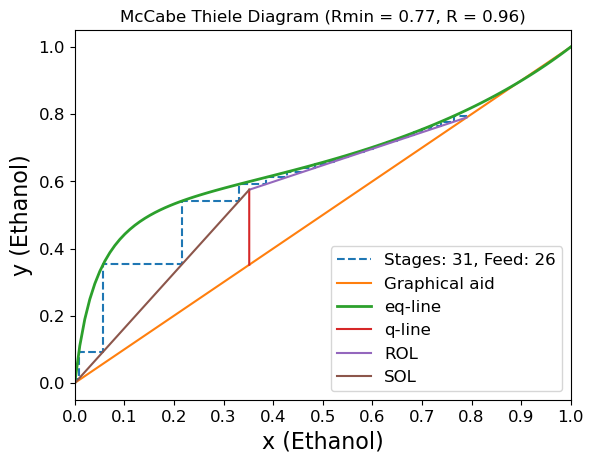

In [18]:
from matplotlib import pyplot as plt
D1.plot_stages()
plt.show()

### References

<a id='References'></a>

1. Seider, W. D.; Lewin, D. R.; Seader, J. D.; Widagdo, S.; Gani, R.; Ng, M. K. Cost Accounting and Capital Cost Estimation. In Product and Process Design Principles; Wiley, 2017; pp 426−485.
2. Svrcek, W. Y.; Monnery, W. D. Design Two-Phase Separators Within the Right Limits. In Chemical Engineering Progress (CEP); The American Institute of Chemical Engineers, 1993; pp 53−60.
3. Apostolakou, A. A.; Kookos, I. K.; Marazioti, C.; Angelopoulos, K. C. Techno-Economic Analysis of a Biodiesel Production Process from Vegetable Oils. Fuel Process. Technol. 2009, 90, 1023−1031.
4. Green, D. W. Distillation. In Perry’s Chemical Engineers’ Handbook, 9 ed.; McGraw-Hill Education, 2018.
5. Duss, M.; Taylor, R. Predict Distillation Tray Efficiency. Chem. Eng. Prog. 2018, 24−30.